In [72]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import operator
import os

In [ ]:
BASE_DIR='./outputs/second'
SUBFAMILY_SIZE=5

In [73]:
OUTPUT_DIR = "./plot_builder_output"
os.makedirs(f"{OUTPUT_DIR}/heatmaps", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/lineplot", exist_ok=True)

In [ ]:
def make_heatmap(results : dict, our_results : dict, title : str, baseline : str, minimizing = True, add_whole_family_value = True):
    values = np.array([list(item[-2].values()) for train, item in results.items()]).squeeze(axis=-1)
    values[~np.isfinite(values)] = np.nan
    # if add_whole_family_value:
        # entire_family_values = np.array([item[-1] for train, item in results.items()])
        # values = np.hstack([values, entire_family_values[..., None]])
    values = np.vstack([values, our_results['ours']])
    if add_whole_family_value:
        entire_family_values = np.array([item[-1] if item[-1] is not None else np.nan for train, item in results.items()] + [our_results['whole_family']])
        # entire_family_values[~np.isfinite(entire_family_values)] = np.nan
        values = np.hstack([values, entire_family_values[..., None]])
    plt.figure(figsize=(16,9))
    
    ax = sns.heatmap(values, annot=True, vmin=np.nanmin(values), vmax=np.nanmax(values), cmap=sns.cm.rocket_r if minimizing else sns.cm.rocket, mask=~np.isfinite(values), fmt='.2f')
    
    # if add_whole_family_value:
        # ax.add_patch(Rectangle((0,0), 10, 11, fill=False, edgecolor='white', lw=3)) # White bounding box
    
    subfamily_size = len(results.keys())
    
    best_value = np.inf if minimizing else -np.inf
    for r in range(values.shape[0]):
        row_values = values[r][:-1] if add_whole_family_value else values[r]
        idx = np.nanargmax(row_values) if minimizing else np.nanargmin(row_values)
        cmp = operator.le if minimizing else operator.ge
        if cmp(row_values[idx], best_value):
            best_value = row_values[idx]
            best_rectangle = (idx, r)
        ax.add_patch(Rectangle((idx, r),1,1, fill=False, edgecolor='blue', lw=3))
    ax.add_patch(Rectangle(best_rectangle,1,1, fill=False, edgecolor='green', lw=3))
    
    if add_whole_family_value:
        best_family_idx = np.nanargmin(values[:, -1]) if minimizing else np.nanargmax(values[:, -1])
        ax.add_patch(Rectangle((subfamily_size, best_family_idx),1,1, fill=False, edgecolor='green', lw=3))
    
    ax.set_xlabel("Test")
    ax.set_ylabel("Train")
    plt.yticks(rotation=0) 
    xticks = [f"{i}" for i in range(subfamily_size)]
    if add_whole_family_value:
        xticks += ["Entire family"]
    ax.set_xticklabels(xticks) 
    ax.set_yticklabels([f"{baseline} on {i} ({results[i][1].num_nodes}-FSC)" for i in range(subfamily_size)] + ["Ours: GD on (sub)family"])
    ax.set_title(f"{title}: {baseline} vs Ours ({'lower' if minimizing else 'higher'} is better)")
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/heatmaps/{title}-{baseline}.png")

In [75]:
def make_lineplot(results : dict, title : str = 'Placeholder', minimizing = True, type_of_plot = 'family_trace'):
    plt.figure()
    plt.title(f"{title} ({'lower' if minimizing else 'higher'} is better)")
    plt.xlabel("Iteration")
    plt.ylabel("Worst family member value")
    plt.plot(results['gd-normal'][type_of_plot], label='Paynt GD')
    plt.plot(results['gd-no-momentum'][type_of_plot], label='Paynt GD (no momentum)')
    plt.plot(results['gd-random'][type_of_plot], label='Random GD')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/lineplot/{title}.png")

[Errno 2] No such file or directory: 'outputs/avoid/gd-experiment.pickle'


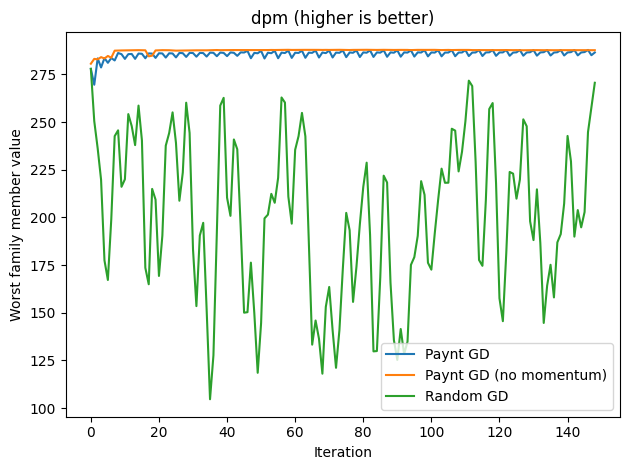

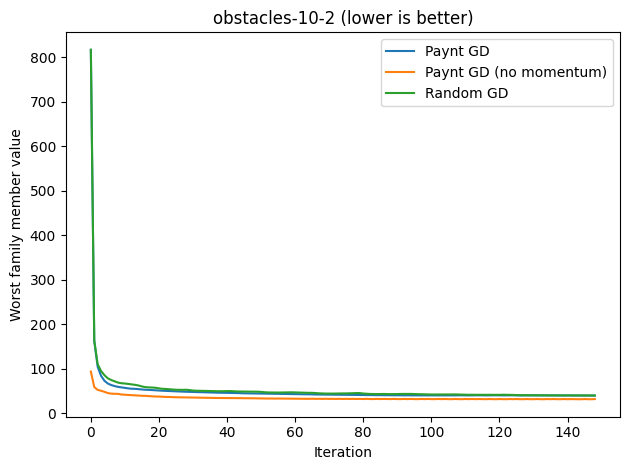

In [76]:
for env in ['dpm', 'obstacles-10-2', 'avoid']:
    try:
        with open(f"outputs/{env}/gd-experiment.pickle", 'rb') as handle:
            results = pickle.load(handle)
            make_lineplot(results, title=env, minimizing='dpm' not in env.lower())
    except FileNotFoundError as fnfe:
        print(fnfe)

# DPM

timeout = 10s

In [77]:
dpm_our = [504.76099479, 496.6463078,  522.29707964, 471.26597349, 483.96767624,
 463.09737765, 294.67001291, 498.28841493, 510.35243059, 509.71750883]

In [ ]:
with open(f"{BASE_DIR}/dpm/{SUBFAMILY_SIZE}/ours.pickle", 'rb') as handle:
    ours = pickle.load(handle)

In [ ]:
with open("{BASE_DIR}/dpm/{SUBFAMILY_SIZE}/saynt.pickle", 'rb') as handle:
    subfamily_saynt_results = pickle.load(handle)

In [125]:
for i in range(10):
    fsc = subfamily_saynt_results[i][1]
    print(i, fsc.num_nodes)
    for j in range(fsc.num_nodes):
        print(fsc.update_function[j])

0 3
[{0: 1.0}, {1: 1.0}, {0: 1.0}]
[{1: 1.0}, {2: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
1 4
[{3: 1.0}, {3: 1.0}, {0: 1.0}]
[{0: 1.0}, {2: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
[{1: 1.0}, {1: 1.0}, {0: 1.0}]
2 4
[{1: 1.0}, {3: 1.0}, {0: 1.0}]
[{0: 1.0}, {1: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
[{3: 1.0}, {2: 1.0}, {0: 1.0}]
3 3
[{0: 1.0}, {1: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
[{1: 1.0}, {2: 1.0}, {0: 1.0}]
4 3
[{2: 1.0}, {1: 1.0}, {0: 1.0}]
[{1: 1.0}, {2: 1.0}, {0: 1.0}]
[{0: 1.0}, {2: 1.0}, {0: 1.0}]
5 4
[{1: 1.0}, {3: 1.0}, {0: 1.0}]
[{3: 1.0}, {2: 1.0}, {0: 1.0}]
[{0: 1.0}, {1: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
6 3
[{1: 1.0}, {1: 1.0}, {0: 1.0}]
[{2: 1.0}, {2: 1.0}, {0: 1.0}]
[{0: 1.0}, {0: 1.0}, {0: 1.0}]
7 3
[{0: 1.0}, {1: 1.0}, {0: 1.0}]
[{2: 1.0}, {0: 1.0}, {0: 1.0}]
[{1: 1.0}, {2: 1.0}, {0: 1.0}]
8 4
[{2: 1.0}, {3: 1.0}, {0: 1.0}]
[{1: 1.0}, {0: 1.0}, {0: 1.0}]
[{0: 1.0}, {2: 1.0}, {0: 1.0}]
[{3: 1.0}, {1: 1.0}, {0: 1.0}]
9 4

In [80]:
with open("outputs/dpm/10/gd.pickle", 'rb') as handle:
    subfamily_gd_results = pickle.load(handle)

In [81]:
values = np.array([list(item[-2].values()) for train, item in subfamily_gd_results.items()]).squeeze(axis=-1)
values[~np.isfinite(values)] = np.nan
values = np.vstack([values, dpm_our])
entire_family_values = np.array([item[-1] for train, item in subfamily_gd_results.items()] + [np.nan])
values = np.hstack([values, entire_family_values[:, None]])

In [82]:
values.shape, entire_family_values.shape

((11, 11), (11,))

In [83]:
ours

{'ours': array([501.43201274, 495.57526291, 520.94980303, 471.93196525,
        484.50302646, 464.69817836, 293.25817419, 496.20957088,
        509.10724826, 510.00162779]),
 'whole_family': 287.29654902664026}

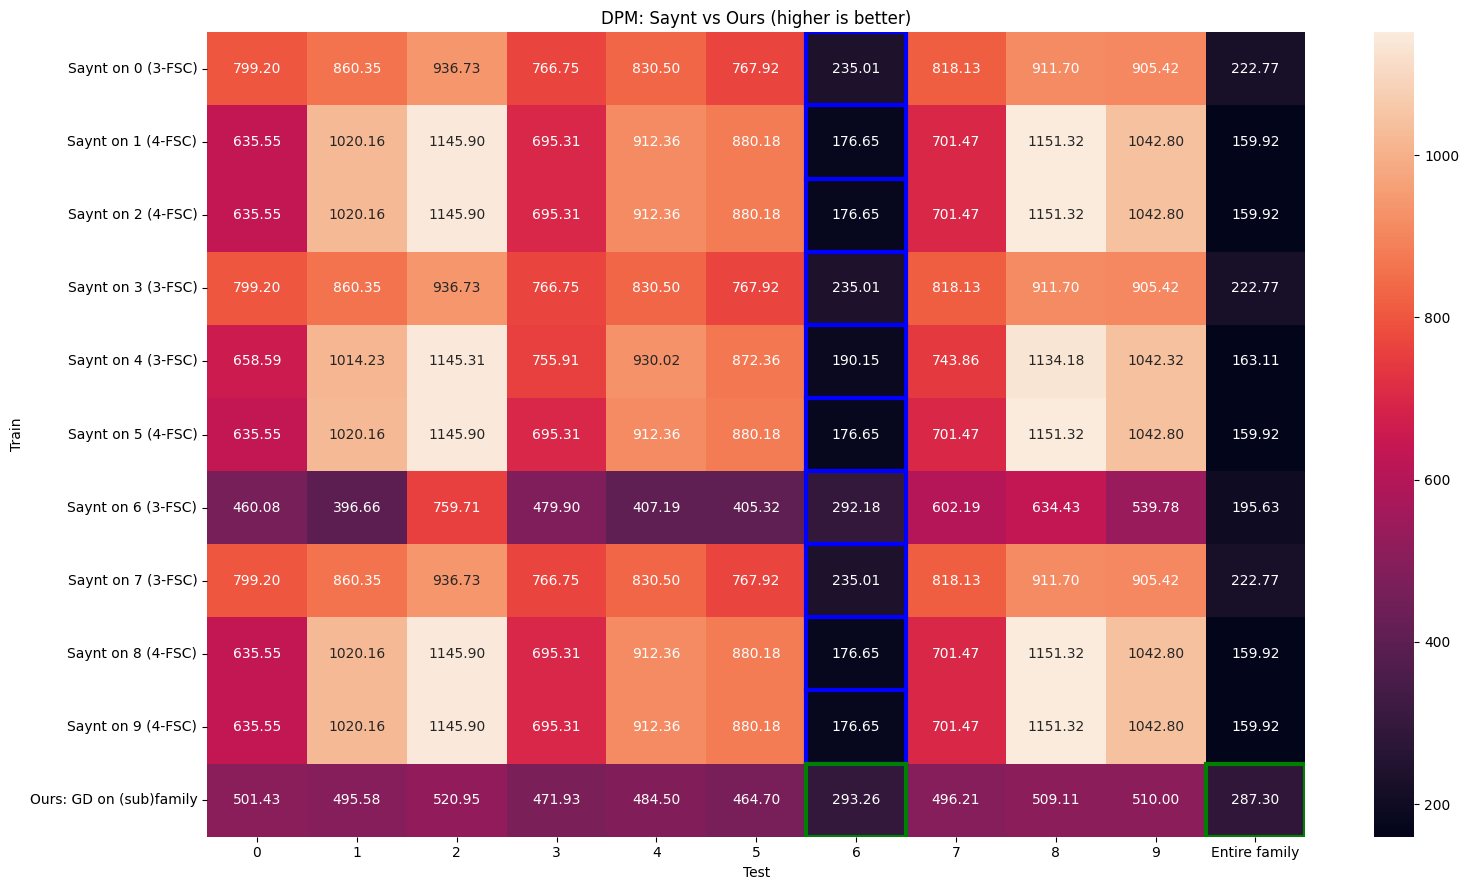

In [84]:
make_heatmap(subfamily_saynt_results, ours, "DPM", "Saynt", minimizing=False)

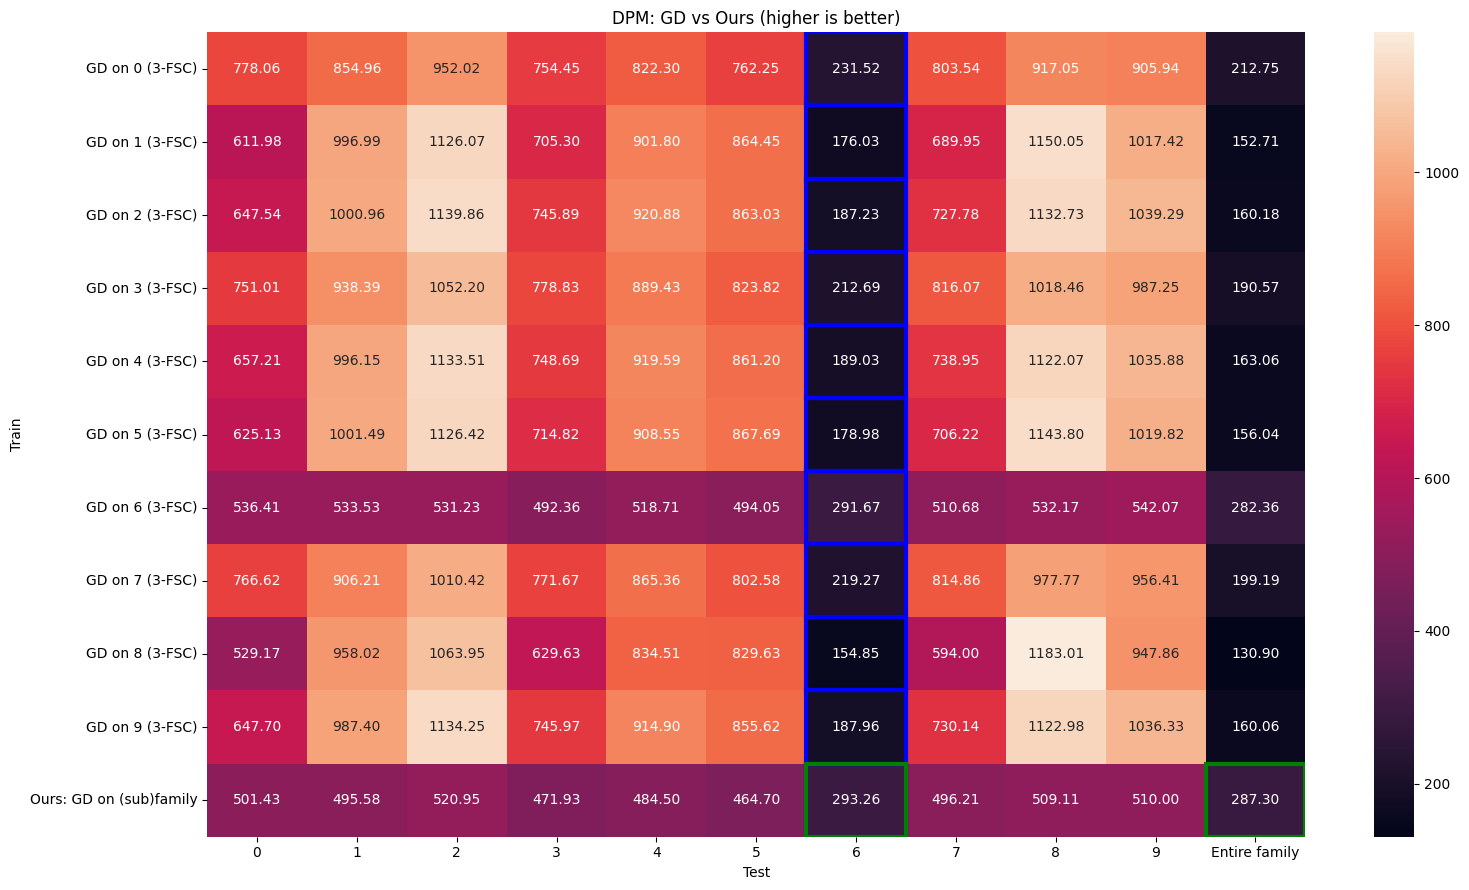

In [85]:
make_heatmap(subfamily_gd_results, ours, "DPM", "GD", minimizing=False)

# OBSTACLES 8 3

timeout = 30s

In [86]:
with open("outputs/obstacles-8-3/10/saynt.pickle", 'rb') as handle:
    saynt = pickle.load(handle)

In [87]:
with open("outputs/obstacles-8-3/10/gradient.pickle", 'rb') as handle:
    gradient = pickle.load(handle)

In [88]:
with open("outputs/obstacles-8-3/10/ours.pickle", 'rb') as handle:
    ours = pickle.load(handle)

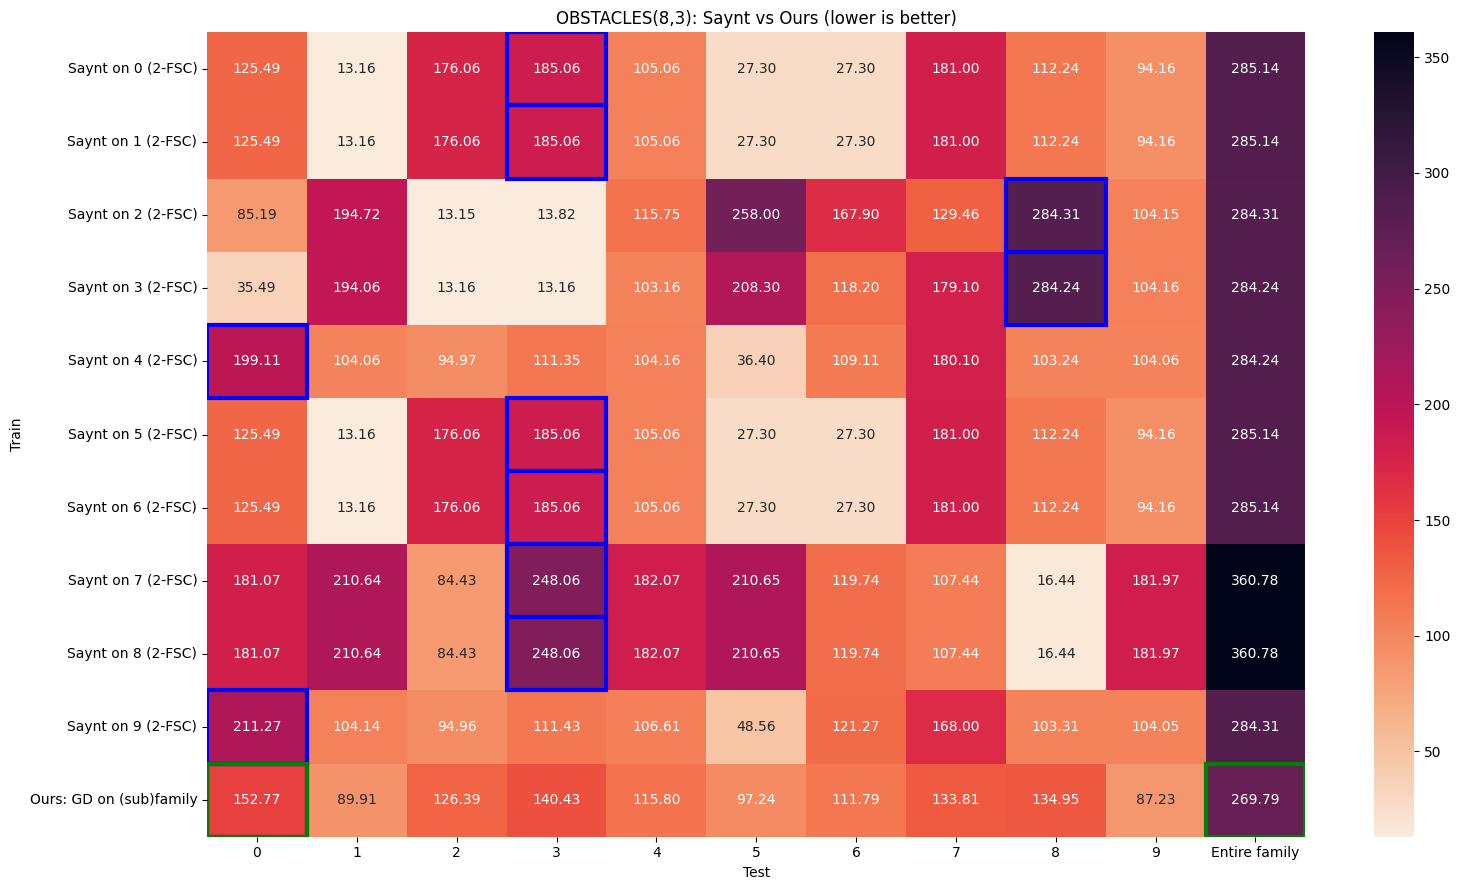

In [89]:
make_heatmap(saynt, ours, "OBSTACLES(8,3)", "Saynt")

## Gradient baseline

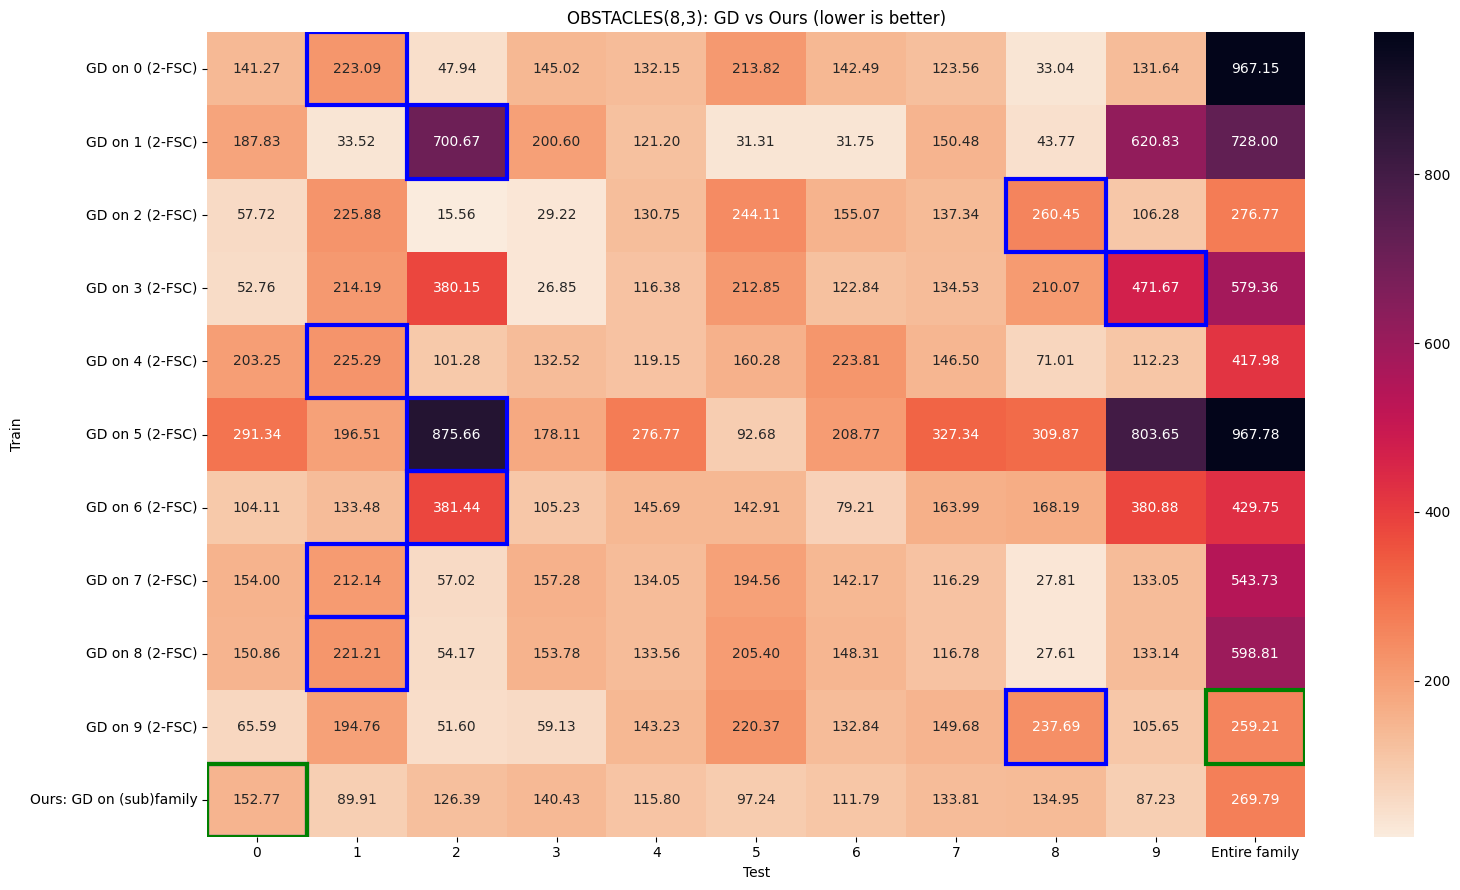

In [90]:
make_heatmap(gradient, ours, "OBSTACLES(8,3)", "GD")

# OBSTACLES 10 2

timeout = 10s

In [91]:
with open("outputs/obstacles-10-2/10/ours.pickle", 'rb') as handle:
    ours = pickle.load(handle)

In [92]:
with open("outputs/obstacles-10-2/10/saynt.pickle", 'rb') as handle:
    subfamily_saynt_results = pickle.load(handle)

In [93]:
with open("outputs/obstacles-10-2/10/gd.pickle", 'rb') as handle:
    subfamily_gd_results = pickle.load(handle)

In [94]:
ours_raw = [27.85853738, 28.71888006, 30.78940948, 28.75065993, 29.3297606,  30.77959397,
 29.48840814, 29.3297606,  28.22878829, 30.14997737]

In [95]:
ours

{'ours': array([29.71332153, 34.75044441, 34.78858378, 28.91082002, 29.31422517,
        34.66742393, 29.53309369, 29.31422517, 30.3172947 , 34.80426136]),
 'whole_family': 43.10328317207831}

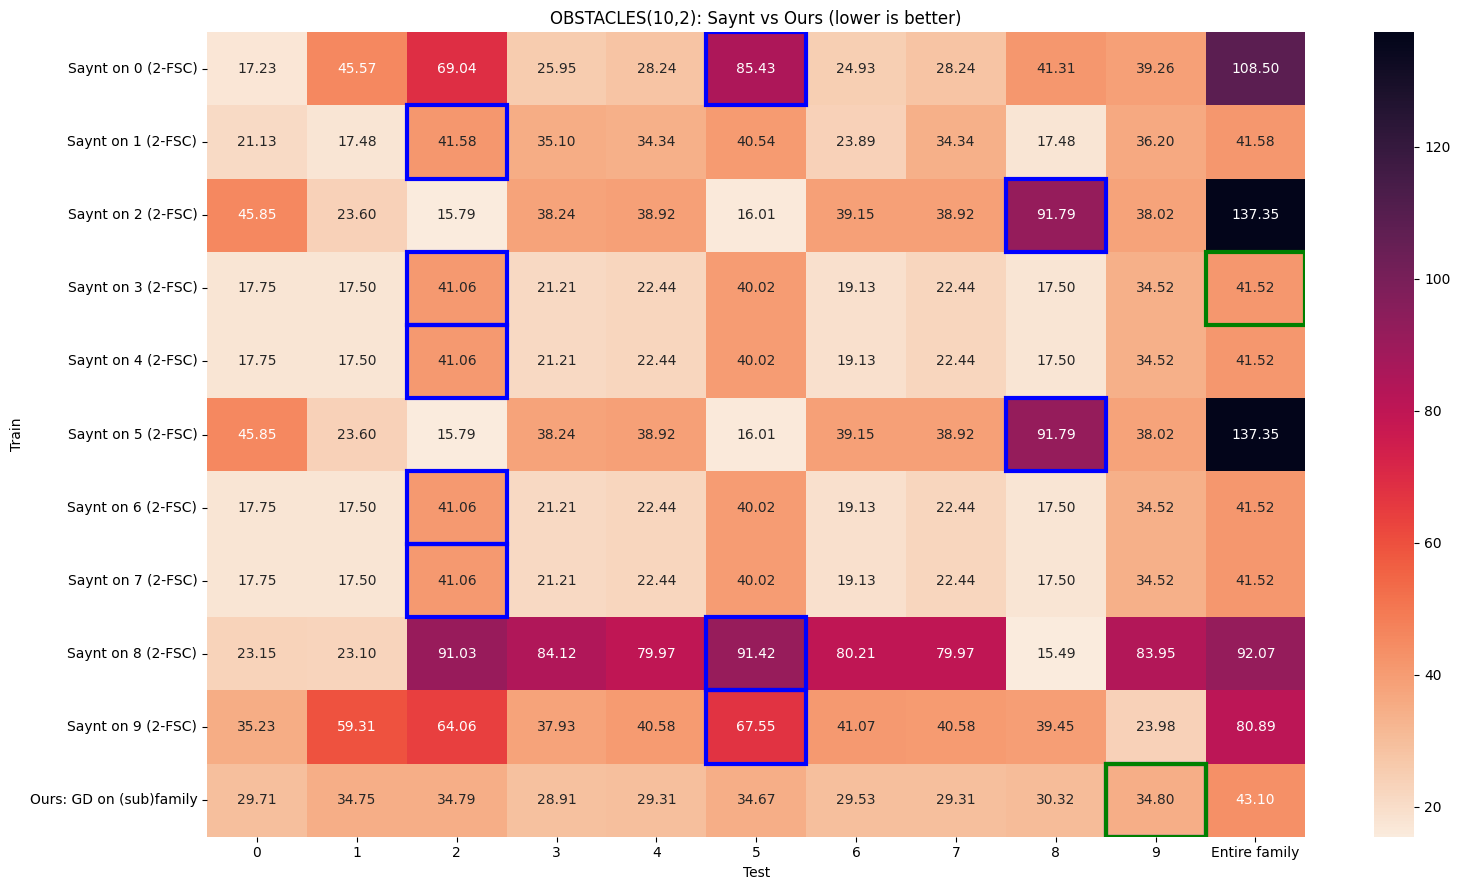

In [96]:
make_heatmap(subfamily_saynt_results, ours, "OBSTACLES(10,2)", "Saynt")

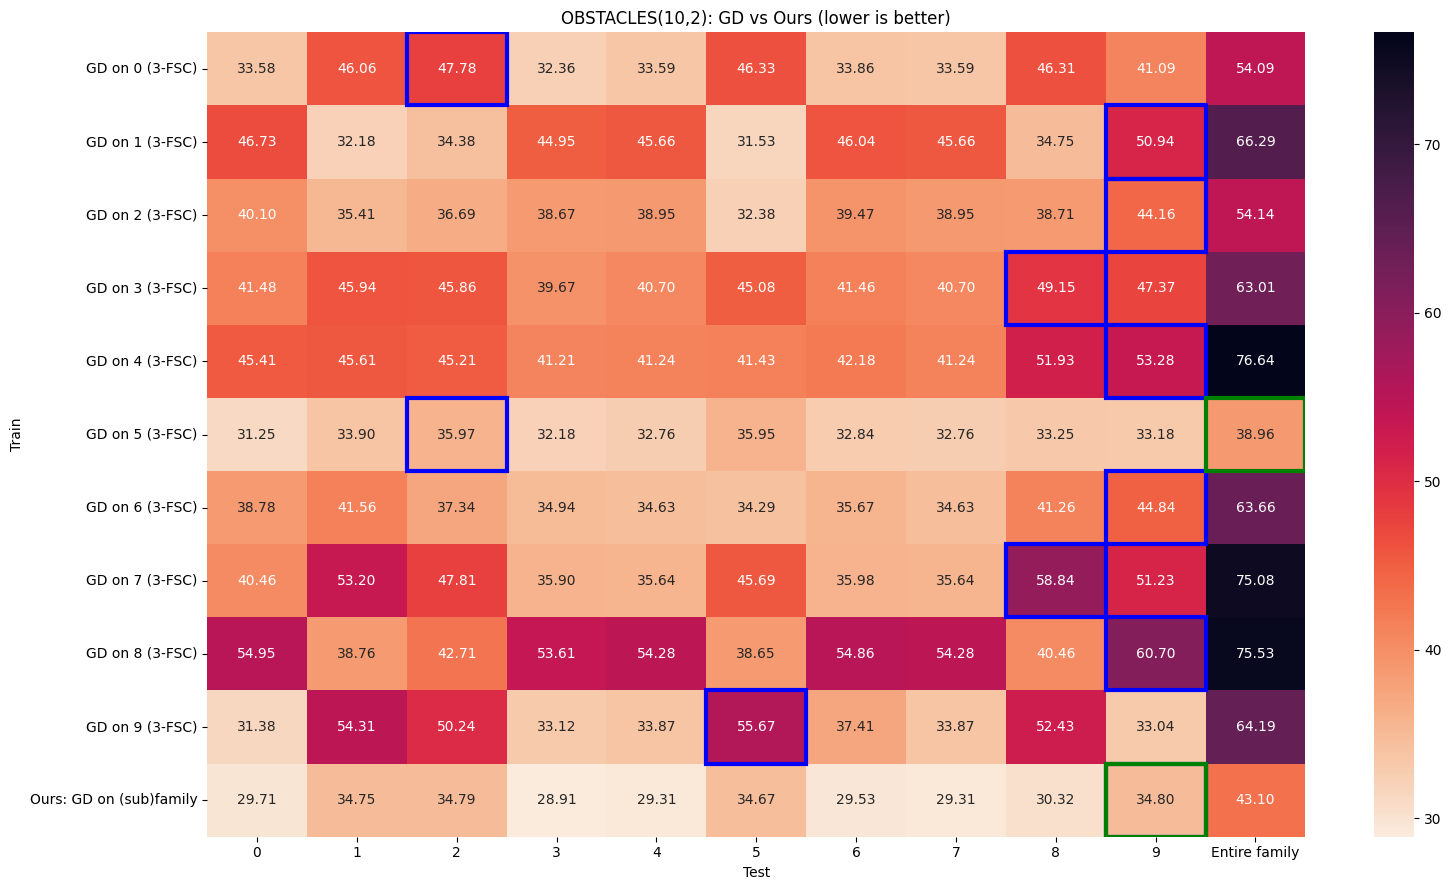

In [97]:
make_heatmap(subfamily_gd_results, ours, "OBSTACLES(10,2)", "GD")

# AVOID

timeout = 60s

In [98]:
with open("outputs/avoid/10/ours.pickle", 'rb') as handle:
    ours = pickle.load(handle)

In [99]:
ours

{'ours': array([80.86308042, 69.84679096, 57.64285018, 79.21669863, 63.29178246,
        65.26238688, 80.07232592, 66.57724146, 76.42203023, 62.8002326 ]),
 'whole_family': 166.60389407163706}

In [127]:
with open("outputs/avoid/10/paynt.pickle", 'rb') as handle:
    subfamily_paynt_results = pickle.load(handle)

In [128]:
with open("outputs/avoid/10/gd.pickle", 'rb') as handle:
    subfamily_gd_results = pickle.load(handle)

In [129]:
with open("outputs/avoid/10/saynt.pickle", 'rb') as handle:
    subfamily_saynt_results = pickle.load(handle)

In [130]:
for i in range(10):
    fsc = subfamily_gd_results[i][1]
    print(i, fsc.update_function)

0 [[{0: 0.1776929986970881, 1: 0.8223070013029119}, {0: 0.5362347093607216, 1: 0.46376529063927835}, {0: 0.6485583136417751, 1: 0.35144168635822487}, {0: 0.06795277604521241, 1: 0.9320472239547877}, {0: 0.3438012397192482, 1: 0.6561987602807519}, {0: 0.12116114934891442, 1: 0.8788388506510857}, {0: 0.8984935519651447, 1: 0.10150644803485526}, {0: 0.25641552776318766, 1: 0.7435844722368122}, {0: 0.26551336621979765, 1: 0.7344866337802023}, {0: 0.8097102885107058, 1: 0.19028971148929422}, {0: 0.0652815759704871, 1: 0.9347184240295128}], [{0: 0.6905650280488936, 1: 0.3094349719511065}, {0: 0.9180088112243121, 1: 0.08199118877568778}, {0: 0.36634014314040264, 1: 0.6336598568595974}, {0: 0.10597720590560968, 1: 0.8940227940943904}, {0: 0.3785408796139466, 1: 0.6214591203860534}, {0: 0.9495925233211915, 1: 0.050407476678808454}, {0: 0.752868753313633, 1: 0.24713124668636688}, {0: 0.34636845212293105, 1: 0.653631547877069}, {0: 0.7141709202005291, 1: 0.2858290797994709}, {0: 0.672653806184475

In [146]:
for i in range(10):
    fsc = subfamily_saynt_results[i][1]
    print("POMDP", i, 'with a', f"{fsc.num_nodes}-FSC. Memory update:")
    for j in range(fsc.num_nodes):
        # print(fsc.update_function[j])
        print("Node", j, [list(d.keys())[0] for d in fsc.update_function[j] if len(d) == 1])

POMDP 0 with a 2-FSC. Memory update:
Node 0 [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Node 1 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
POMDP 1 with a 2-FSC. Memory update:
Node 0 [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
Node 1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
POMDP 2 with a 4-FSC. Memory update:
Node 0 [0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
Node 1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 3 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
POMDP 3 with a 2-FSC. Memory update:
Node 0 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Node 1 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
POMDP 4 with a 2-FSC. Memory update:
Node 0 [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
Node 1 [0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
POMDP 5 with a 5-FSC. Memory update:
Node 0 [2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0]
Node 1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 2 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 3 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
POMDP 6 with a 5-FSC. Memory update:
Node 0 [3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
Node 1 [0

In [103]:
l = [51.94674404, 65.42364497, 63.76348781, 98.68745545, 32.52550974, 67.09607064,
 87.41523619, 64.81453459, 53.95332456, 56.50783793]

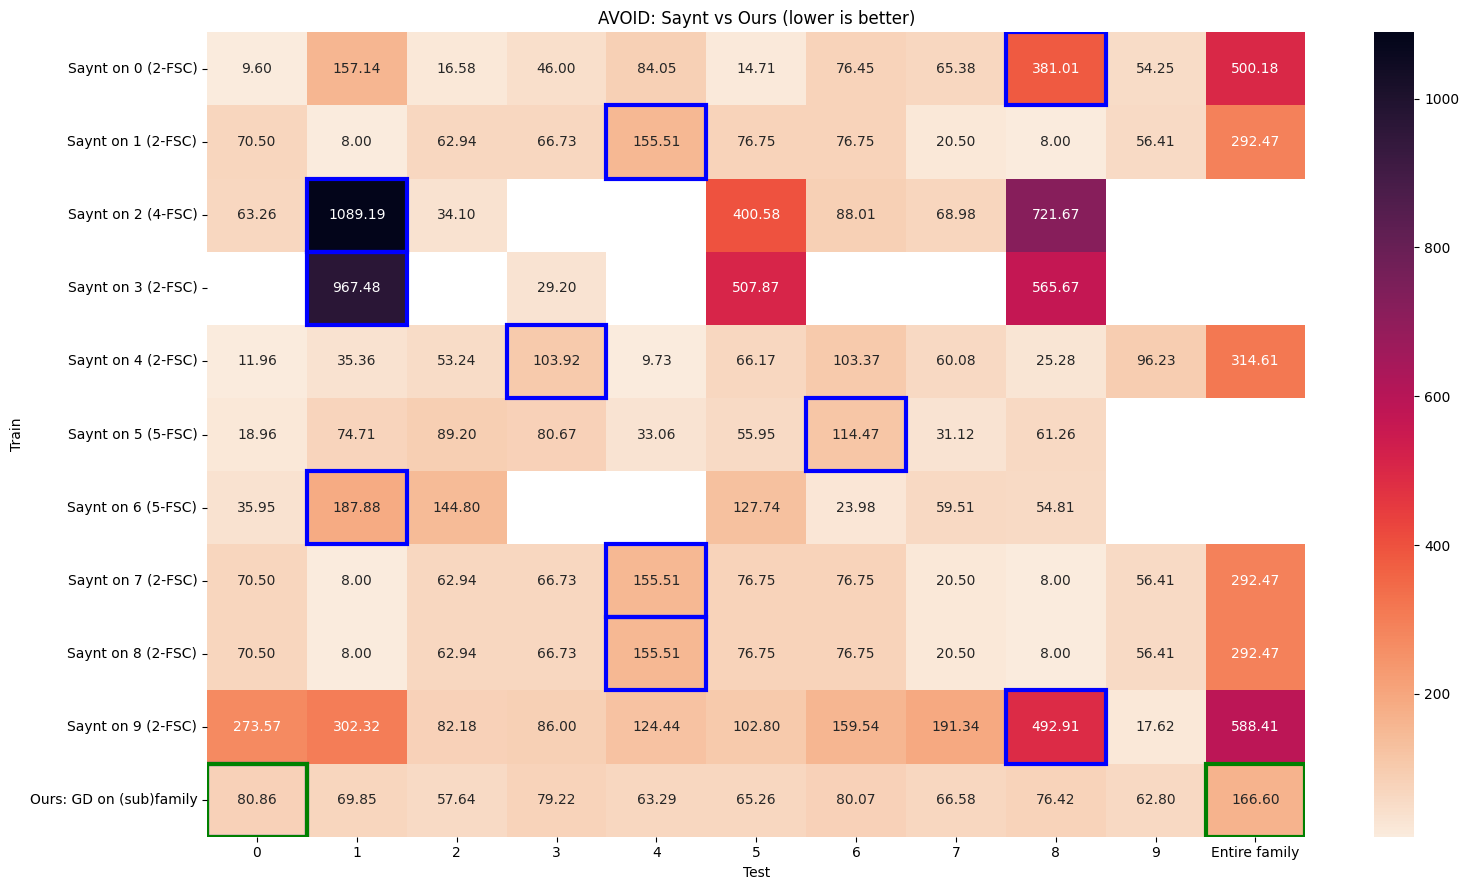

In [104]:
make_heatmap(subfamily_saynt_results, ours, "AVOID", "Saynt")

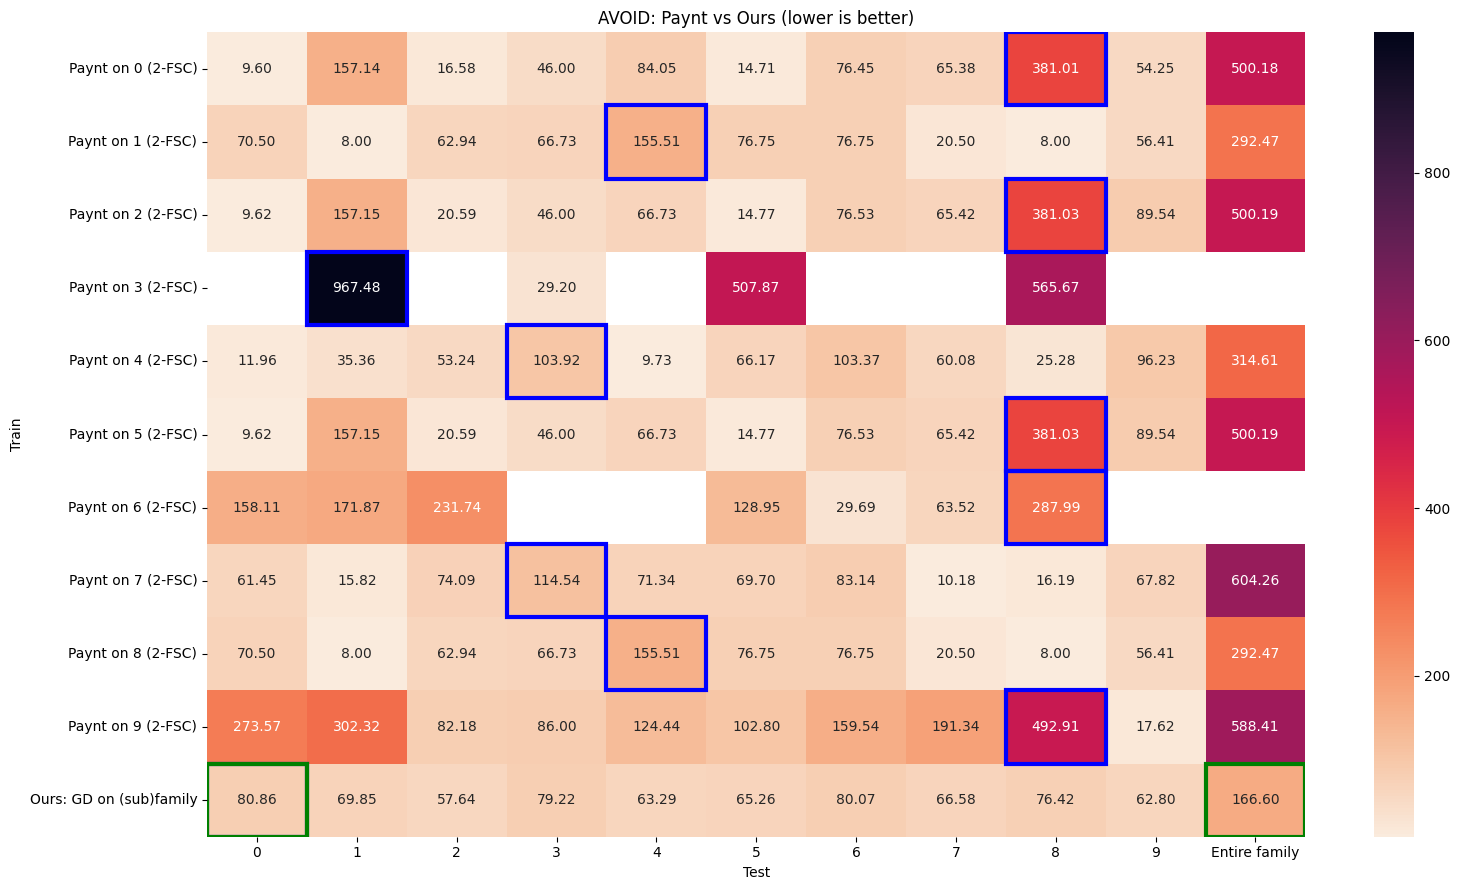

In [105]:
make_heatmap(subfamily_paynt_results, ours, "AVOID", "Paynt")

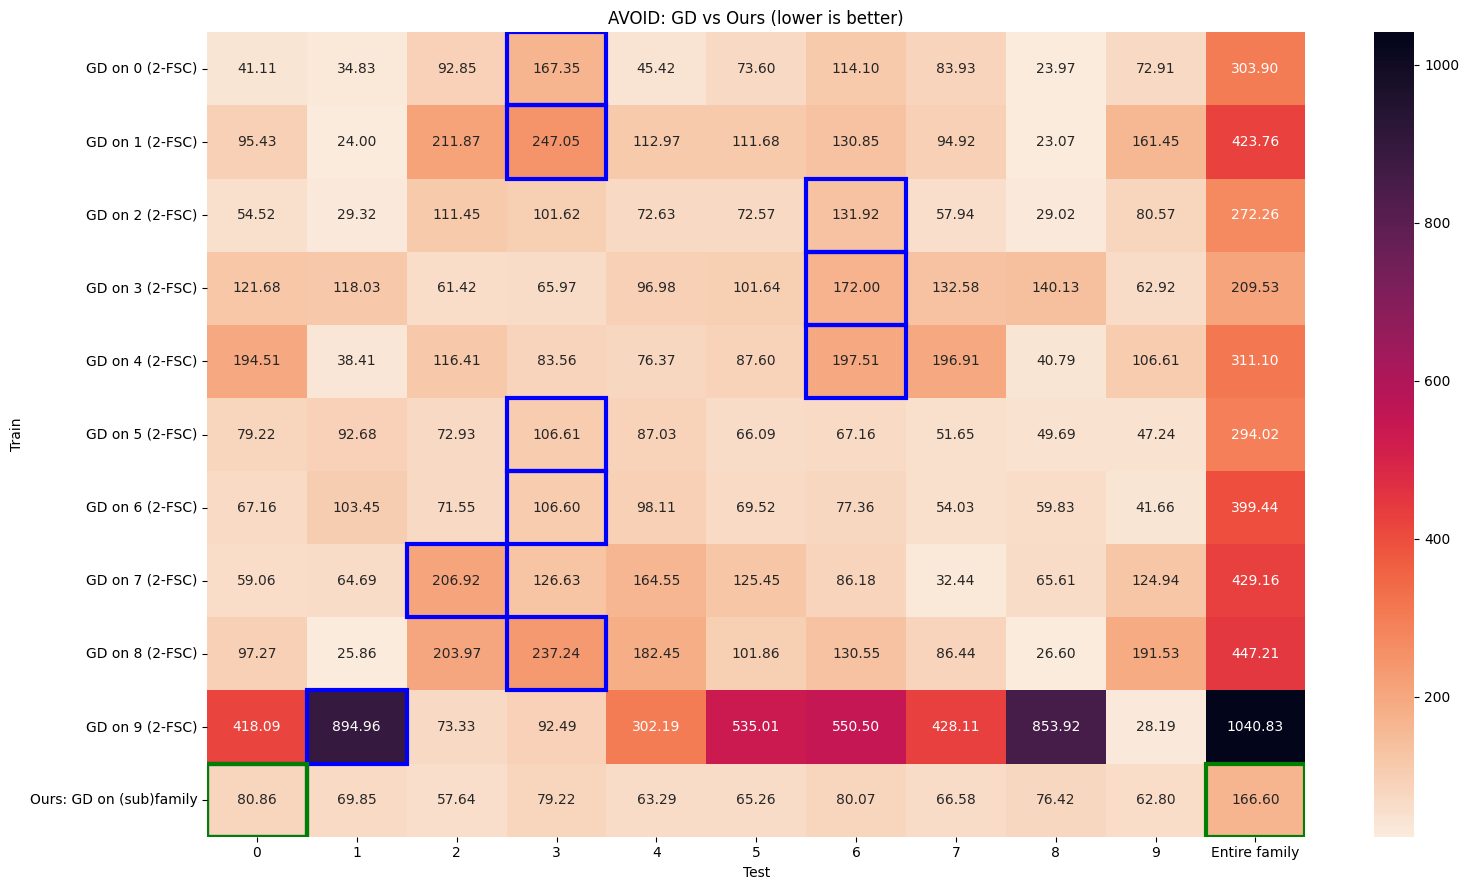

In [106]:
make_heatmap(subfamily_gd_results, ours, "AVOID", "GD")